In [1]:
 !pip install transformers datasets evaluate rouge_score accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB

In [2]:
from datasets import load_dataset
dataset = load_dataset("gopalkalpande/bbc-news-summary")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['File_path', 'Articles', 'Summaries'],
        num_rows: 2224
    })
})

In [4]:
for split in dataset.keys():
    dataset[split] = dataset[split].rename_column('File_path', 'Category')
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['Category', 'Articles', 'Summaries'],
        num_rows: 2224
    })
})


In [5]:
data = dataset["train"]
df = data.to_pandas()

df.head()

,Category,Articles,Summaries
0,politics,Budget to set scene for election..Gordon Brown...,- Increase in the stamp duty threshold from £6...
1,politics,Army chiefs in regiments decision..Military ch...,"""They are very much not for the good and will ..."
2,politics,Howard denies split over ID cards..Michael How...,Michael Howard has denied his shadow cabinet w...
3,politics,Observers to monitor UK election..Ministers wi...,The report said individual registration should...
4,politics,Kilroy names election seat target..Ex-chat sho...,"UKIP's leader, Roger Knapman, has said he is g..."


In [6]:
df['Category'].unique()

array(['politics', 'sport', 'tech', 'entertainment', 'business'],
      dtype=object)

In [7]:
import numpy as np
import pandas as pd
import os
import time
import glob
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

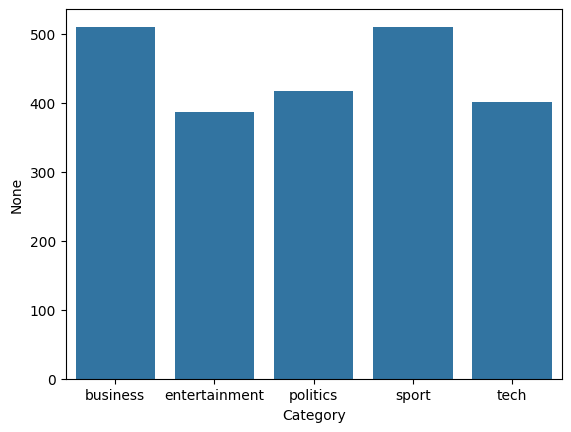

In [8]:
category_sizes = df.groupby('Category').size()
sns.barplot(x=category_sizes.index, y=category_sizes)
plt.show()

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Category', 'Articles', 'Summaries'],
        num_rows: 2224
    })
})

In [10]:
from datasets import DatasetDict
dataset = dataset['train']

In [11]:
dataset

Dataset({
    features: ['Category', 'Articles', 'Summaries'],
    num_rows: 2224
})

In [12]:
dataset.features

{'Category': Value(dtype='string', id=None),
 'Articles': Value(dtype='string', id=None),
 'Summaries': Value(dtype='string', id=None)}

In [13]:
dataset = dataset.train_test_split(test_size=0.2,seed=42)

In [14]:
dataset['train'] = dataset['train'].remove_columns('Category')
dataset['test'] = dataset['test'].remove_columns('Category')
dataset

DatasetDict({
    train: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 445
    })
})

In [15]:
import re

def clean_text(all):
    pattern = r'\\|``|--|"|\n'
    for text in ["Articles","Summaries"]:
      all[text] = re.sub(pattern, '', all[text])
    return all

In [73]:
clean_dataset = dataset.map(clean_text)

In [74]:
clean_dataset

DatasetDict({
    train: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 445
    })
})

In [75]:
test_validation_split = clean_dataset['test'].train_test_split(test_size=0.65)
clean_dataset['validation'] = test_validation_split['train']
clean_dataset['test'] = test_validation_split['test']

In [76]:
clean_dataset

DatasetDict({
    train: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 290
    })
    validation: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 155
    })
})

In [18]:
clean_dataset['train'][0]

{'Articles': "Angels 'favourite funeral song'..Angels by Robbie Williams is the song Britons would most like played at their funeral, a survey has suggested...While the melancholy hit topped the UK poll, Europeans favoured Queen's more upbeat anthem The Show Must Go On as their first choice. Frank Sinatra's My Way was second in the UK vote with Monty Python's Always Look on the Bright Side of Life in third place. More than 45,000 people were surveyed by digital TV station Music Choice...The European chart, which included Denmark, France and Germany, put Led Zeppelin's Stairway to Heaven in second and AC/DC's Highway to Hell in third. Queen's Who Wants to Live Forever was highly favoured by both UK and European voters...Both lists featured only one traditional or classic song each, with Britons requesting the Royal Scots Dragoon Guards' Amazing Grace and their continental counterparts opting for Mozart's Requiem. Wanting to share your most treasured musical gem with those you're leaving

In [19]:
from transformers import AutoTokenizer, PegasusForConditionalGeneration

In [20]:
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-large")
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-large").to("cuda")

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

In [21]:
model.config

PegasusConfig {
  "_name_or_path": "google/pegasus-large",
  "activation_dropout": 0.1,
  "activation_function": "relu",
  "add_bias_logits": false,
  "add_final_layer_norm": true,
  "architectures": [
    "PegasusForConditionalGeneration"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 16,
  "decoder_start_token_id": 0,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 16,
  "eos_token_id": 1,
  "extra_pos_embeddings": 1,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token_id": 1,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  }

In [25]:
def generate_answer(batch):
  input_ids = tokenizer(batch["Articles"], padding="max_length", max_length=1024, return_tensors="pt", truncation=True).input_ids.to("cuda")
  attention_mask = tokenizer(batch["Articles"], padding="max_length", max_length=1024, return_tensors="pt", truncation=True).attention_mask.to("cuda")
  predicted_abstract_ids = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=256, num_beams=5, length_penalty=0.8)
  batch["predicted_abstract"] = tokenizer.decode(predicted_abstract_ids[0], skip_special_tokens=True,clean_up_tokenization_spaces=True)
  print(batch["predicted_abstract"])
  return batch

In [23]:
from datasets import load_dataset, load_metric
rouge = load_metric("rouge")

<ipython-input-23-3d26b5dc6f28>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [56]:
dataset_small = {split: clean_dataset[split].select(range(2)) for split in clean_dataset.keys()}
dataset_small = DatasetDict(dataset_small)
dataset_small

DatasetDict({
    train: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 2
    })
    test: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 2
    })
})

In [26]:
dataset_small = {split: clean_dataset[split].select(range(2)) for split in clean_dataset.keys()}
dataset_small = DatasetDict(dataset_small)

result_small = dataset_small.map(generate_answer)
rouge.compute(predictions=result_small[split]["predicted_abstract"], references=result_small[split]["Summaries"])

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Angels 'favourite funeral song'..Angels by Robbie Williams is the song Britons would most like played at their funeral, a survey has suggested...While the melancholy hit topped the UK poll, Europeans favoured Queen's more upbeat anthem The Show Must Go On as their first choice.
Everton's Weir cools Euro hopes..Everton defender David Weir has played down talk of European football, despite his team lying in second place in the Premiership after beating Liverpool...Weir told BBC Radio Five Live: We don't want to rest on our laurels and say we have achieved anything yet.


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Mumbai bombs movie postponed..The release of a film about the Mumbai (Bombay) blasts in 1993 has been postponed following protests by those on trial for the bombings...Investigating the blasts which killed more than 250 people and wounded 1,000, the film Black Friday had been due to open across India on Friday.
On the basis of the latest information the UK has entered 2005 on course to continue its record period of growth, said Paul Boateng, chief secretary to the Treasury in a statement...The ONS said the services sector, which accounts for nearly three-quarters of the UK economy, grew 1.0% in the quarter. The ONS said a sharp fall in mining and quarrying, which was driven by oil and gas extraction, was primarily responsible for the overall contraction in manufacturing production figures...Simon Rubinsohn, chief economist at Gerrard, said: This outturn (of 0.7%) was well ahead of the market expectations and cast doubt on the scare stories doing the rounds surrounding the current state

{'rouge1': AggregateScore(low=Score(precision=0.5384615384615384, recall=0.36363636363636365, fmeasure=0.43410852713178294), mid=Score(precision=0.7266775777414075, recall=0.43475935828877005, fmeasure=0.5428118393234673), high=Score(precision=0.9148936170212766, recall=0.5058823529411764, fmeasure=0.6515151515151516)),
 'rouge2': AggregateScore(low=Score(precision=0.47058823529411764, recall=0.3157894736842105, fmeasure=0.3779527559055118), mid=Score(precision=0.6809462915601023, recall=0.40194235588972427, fmeasure=0.5043609933373713), high=Score(precision=0.8913043478260869, recall=0.4880952380952381, fmeasure=0.6307692307692307)),
 'rougeL': AggregateScore(low=Score(precision=0.5319148936170213, recall=0.29411764705882354, fmeasure=0.3787878787878788), mid=Score(precision=0.5351882160392798, recall=0.32887700534759357, fmeasure=0.40644820295983086), high=Score(precision=0.5384615384615384, recall=0.36363636363636365, fmeasure=0.43410852713178294)),
 'rougeLsum': AggregateScore(low=

In [27]:
result_small['train'][0]

{'Articles': "Angels 'favourite funeral song'..Angels by Robbie Williams is the song Britons would most like played at their funeral, a survey has suggested...While the melancholy hit topped the UK poll, Europeans favoured Queen's more upbeat anthem The Show Must Go On as their first choice. Frank Sinatra's My Way was second in the UK vote with Monty Python's Always Look on the Bright Side of Life in third place. More than 45,000 people were surveyed by digital TV station Music Choice...The European chart, which included Denmark, France and Germany, put Led Zeppelin's Stairway to Heaven in second and AC/DC's Highway to Hell in third. Queen's Who Wants to Live Forever was highly favoured by both UK and European voters...Both lists featured only one traditional or classic song each, with Britons requesting the Royal Scots Dragoon Guards' Amazing Grace and their continental counterparts opting for Mozart's Requiem. Wanting to share your most treasured musical gem with those you're leaving

In [31]:
dataset_small['train'][0]['Articles']

"Angels 'favourite funeral song'..Angels by Robbie Williams is the song Britons would most like played at their funeral, a survey has suggested...While the melancholy hit topped the UK poll, Europeans favoured Queen's more upbeat anthem The Show Must Go On as their first choice. Frank Sinatra's My Way was second in the UK vote with Monty Python's Always Look on the Bright Side of Life in third place. More than 45,000 people were surveyed by digital TV station Music Choice...The European chart, which included Denmark, France and Germany, put Led Zeppelin's Stairway to Heaven in second and AC/DC's Highway to Hell in third. Queen's Who Wants to Live Forever was highly favoured by both UK and European voters...Both lists featured only one traditional or classic song each, with Britons requesting the Royal Scots Dragoon Guards' Amazing Grace and their continental counterparts opting for Mozart's Requiem. Wanting to share your most treasured musical gem with those you're leaving behind is th

# Doing summarization with second way: pipelines


In [41]:
from transformers import pipeline
pipe = pipeline('summarization',model='google/pegasus-cnn_dailymail')
pipe_out = pipe(dataset_small['train'][0:2]['Articles'])

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
print(pipe_out[0]['summary_text'].replace("<n>"," "))

Frank Sinatra's My Way was second in the UK vote with Monty Python's Always Look on the Bright Side of Life in third . The European chart, which included Denmark, France and Germany, put Led Zeppelin's Stairway to Heaven in second and AC/DC's Highway to Hell in third .


In [38]:
result_small["train"][0]["Summaries"]

"Queen's Who Wants to Live Forever was highly favoured by both UK and European voters.While the melancholy hit topped the UK poll, Europeans favoured Queen's more upbeat anthem The Show Must Go On as their first choice.Frank Sinatra's My Way was second in the UK vote with Monty Python's Always Look on the Bright Side of Life in third place.Angels by Robbie Williams is the song Britons would most like played at their funeral, a survey has suggested."

In [40]:
print(pipe_out[0]['summary_text'].replace("<n>"," "))
prediction_text = str(pipe_out[0]['summary_text'].replace("<n>", " "))
reference_text = result_small["train"][0]["Summaries"]
predictions = [prediction_text]
references = [reference_text]

rouge.compute(predictions=predictions, references=references)

Frank Sinatra's My Way was second in the UK vote with Monty Python's Always Look on the Bright Side of Life in third . The European chart, which included Denmark, France and Germany, put Led Zeppelin's Stairway to Heaven in second and AC/DC's Highway to Hell in third .


{'rouge1': AggregateScore(low=Score(precision=0.5961538461538461, recall=0.36470588235294116, fmeasure=0.45255474452554745), mid=Score(precision=0.5961538461538461, recall=0.36470588235294116, fmeasure=0.45255474452554745), high=Score(precision=0.5961538461538461, recall=0.36470588235294116, fmeasure=0.45255474452554745)),
 'rouge2': AggregateScore(low=Score(precision=0.47058823529411764, recall=0.2857142857142857, fmeasure=0.35555555555555557), mid=Score(precision=0.47058823529411764, recall=0.2857142857142857, fmeasure=0.35555555555555557), high=Score(precision=0.47058823529411764, recall=0.2857142857142857, fmeasure=0.35555555555555557)),
 'rougeL': AggregateScore(low=Score(precision=0.5, recall=0.3058823529411765, fmeasure=0.3795620437956205), mid=Score(precision=0.5, recall=0.3058823529411765, fmeasure=0.3795620437956205), high=Score(precision=0.5, recall=0.3058823529411765, fmeasure=0.3795620437956205)),
 'rougeLsum': AggregateScore(low=Score(precision=0.5, recall=0.3058823529411

## Fine tuning pegasus-large (1024)

In [77]:
clean_dataset

DatasetDict({
    train: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 290
    })
    validation: Dataset({
        features: ['Articles', 'Summaries'],
        num_rows: 155
    })
})

In [60]:
def convert_examples_to_features(batch):
    input_encodings = tokenizer(batch['Articles'], max_length=1024, truncation=True, padding='max_length', return_tensors='pt')

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(batch['Summaries'], max_length=256, truncation=True, padding='max_length', return_tensors='pt')

    features = {
        'input_ids': input_encodings['input_ids'].to('cuda'),
        'attention_mask': input_encodings['attention_mask'].to('cuda'),
        'labels': target_encodings['input_ids'].to('cuda')
    }
    return features


In [78]:
dataset_small = clean_dataset
features_small = dataset_small.map(convert_examples_to_features, batched=True)

Map:   0%|          | 0/1779 [00:00<?, ? examples/s]

Map:   0%|          | 0/290 [00:00<?, ? examples/s]

Map:   0%|          | 0/155 [00:00<?, ? examples/s]

In [82]:
features_small

DatasetDict({
    train: Dataset({
        features: ['Articles', 'Summaries', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['Articles', 'Summaries', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 290
    })
    validation: Dataset({
        features: ['Articles', 'Summaries', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 155
    })
})

In [63]:
from transformers import DataCollatorForSeq2Seq, AutoModelForSeq2SeqLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-large")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-large").to("cuda")
seq2seq = DataCollatorForSeq2Seq(tokenizer,model)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [99]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    prediction_length = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["generated_length"] = np.mean(prediction_length)

    return {k: round(v, 4) for k, v in result.items()}

In [103]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

training_args = Seq2SeqTrainingArguments(
    output_dir='pegasus-bbc-news-summary',
    num_train_epochs=3,
    warmup_steps=500,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    learning_rate=2e-5,
    fp16=True,
    predict_with_generate=True,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=32
    #gradient_accumulation_steps=32,
    #this means that the optimizer will accumulate the gradients over 32 steps
    #before performing an update. This is equivalent to having an effective
    #batch size of 1 * 32 = 32. This helps mimic the effects of a larger
    #batch size without requiring more memory.
)

trainer = Seq2SeqTrainer(model=model,
                  args=training_args,
                  tokenizer=tokenizer,
                  data_collator=seq2seq,
                  train_dataset=features_small["train"],
                  eval_dataset=features_small["validation"],
                  compute_metrics=compute_metrics)


trainer.train()


Step,Training Loss,Validation Loss


TrainOutput(global_step=333, training_loss=4.104154357681045, metrics={'train_runtime': 1937.9795, 'train_samples_per_second': 2.754, 'train_steps_per_second': 0.172, 'total_flos': 1.5395066398900224e+16, 'train_loss': 4.104154357681045, 'epoch': 2.99})

In [105]:
from tqdm.auto import tqdm

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                                batch_size=1, device='cuda',
                                column_text="Articles",
                                column_summary="Summaries"):

    article_batches = [dataset[column_text][i:i+batch_size] for i in range(0, len(dataset[column_text]), batch_size)]
    target_batches = [dataset[column_summary][i:i+batch_size] for i in range(0, len(dataset[column_summary]), batch_size)]
    progress_bar = tqdm(total=len(article_batches), desc='Evaluating')
    metric_results = []

    for article_batch, target_batch in zip(article_batches, target_batches):
        inputs = tokenizer(article_batch, max_length=1024, truncation=True,
                           padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                                   attention_mask=inputs["attention_mask"].to(device),
                                   length_penalty=0.8, num_beams=5, max_length=256)

        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                              clean_up_tokenization_spaces=True)
                             for s in summaries]

        metric.add_batch(predictions=decoded_summaries, references=target_batch)
        progress_bar.update(1)

    progress_bar.close()
    score = metric.compute()
    return score

In [ ]:
score = calculate_metric_on_test_ds(
    clean_dataset['test'], rouge, trainer.model, tokenizer, batch_size = 2, column_text = 'Articles', column_summary= 'Summaries'
)


In [108]:
rouge_names = ["rouge1", "rouge2", "rougeL"]
rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame(rouge_dict, index = [f'pegasus'] )

,rouge1,rouge2,rougeL
pegasus,0.542328,0.436414,0.393151


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
model.save_pretrained("pegasus-bbc-news-summary")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 256, 'num_beams': 8, 'length_penalty': 0.8, 'forced_eos_token_id': 1}


In [121]:
path_to_model_directory = "/content/drive/My Drive/Model_Folder/pegasus-bbc-news-summary"
!cp -r pegasus-bbc-news-summary "{path_to_model_directory}"

In [123]:
path_to_token_directory="/content/drive/My Drive/tokenizer"
!cp -r tokenizer "{path_to_model_directory}"

In [112]:
tokenizer.save_pretrained("tokenizer")

('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/spiece.model',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

In [114]:
sample_text = clean_dataset["test"][0]["Articles"]
reference = clean_dataset["test"][0]["Summaries"]

In [115]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 256}
pipe = pipeline("summarization", model=model,tokenizer=tokenizer)

In [118]:
print(sample_text)
print(reference)
print(pipe(sample_text, **gen_kwargs)[0]['summary_text'])

Yahoo celebrates a decade online..Yahoo, one of the net's most iconic companies, is celebrating its 10th anniversary this week...The web portal has undergone remarkable change since it was set up by Stanford University students David Filo and Jerry Yang in a campus trailer. The students wanted a way of keeping track of their web-based interests. The categories lists they devised soon became popular to hundreds of people and the two saw business potential in their idea...Originally dubbed Jerry's Guide to the World Wide Web the firm adopted the moniker Yahoo because the founders liked the dictionary definition of a yahoo as a rude, unsophisticated, uncouth person. The term was popularised by the 18th Century satirist Jonathan Swift in his classic novel, Gulliver's Travels. We were certainly not sophisticated or civilised, Mr Yang told reporters ahead of the anniversary, which will be officially recognised on 2 March...They did have business brains however, and in April 1995 persuaded ve

# Result for Fine Tuned model

In [119]:
prediction_text = pipe(sample_text, **gen_kwargs)[0]['summary_text']
reference_text = clean_dataset["test"][0]["Summaries"]
predictions = [prediction_text]
references = [reference_text]
rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.9682539682539683, recall=0.4066666666666667, fmeasure=0.5727699530516432), mid=Score(precision=0.9682539682539683, recall=0.4066666666666667, fmeasure=0.5727699530516432), high=Score(precision=0.9682539682539683, recall=0.4066666666666667, fmeasure=0.5727699530516432)),
 'rouge2': AggregateScore(low=Score(precision=0.9032258064516129, recall=0.37583892617449666, fmeasure=0.5308056872037915), mid=Score(precision=0.9032258064516129, recall=0.37583892617449666, fmeasure=0.5308056872037915), high=Score(precision=0.9032258064516129, recall=0.37583892617449666, fmeasure=0.5308056872037915)),
 'rougeL': AggregateScore(low=Score(precision=0.7619047619047619, recall=0.32, fmeasure=0.4507042253521127), mid=Score(precision=0.7619047619047619, recall=0.32, fmeasure=0.4507042253521127), high=Score(precision=0.7619047619047619, recall=0.32, fmeasure=0.4507042253521127)),
 'rougeLsum': AggregateScore(low=Score(precision=0.7619047619047619, recall=0.32, 

In [124]:
from transformers import pipeline
pipe = pipeline('summarization',model='google/pegasus-cnn_dailymail')
print(pipe(sample_text, **gen_kwargs)[0]['summary_text'])

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The web portal has undergone remarkable change since it was set up by Stanford University students David Filo and Jerry Yang in a campus trailer .<n>Originally dubbed Jerry's Guide to the World Wide Web the firm adopted the moniker Yahoo because the founders liked the dictionary definition of a yahoo as a rude, unsophisticated, uncouth person .<n>A second round of funding followed in the autumn and the company floated in April 1996 with less than 50 employees .


# Result for pegasus model trained on cnn-dailymail

In [128]:
prediction_text = pipe(sample_text, **gen_kwargs)[0]['summary_text'].replace("<n>", " ")
prediction_text = prediction_text.replace("<n>", " ")
reference_text = clean_dataset["test"][0]["Summaries"]
predictions = [prediction_text]
references = [reference_text]
rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.8461538461538461, recall=0.44, fmeasure=0.5789473684210525), mid=Score(precision=0.8461538461538461, recall=0.44, fmeasure=0.5789473684210525), high=Score(precision=0.8461538461538461, recall=0.44, fmeasure=0.5789473684210525)),
 'rouge2': AggregateScore(low=Score(precision=0.7402597402597403, recall=0.3825503355704698, fmeasure=0.5044247787610621), mid=Score(precision=0.7402597402597403, recall=0.3825503355704698, fmeasure=0.5044247787610621), high=Score(precision=0.7402597402597403, recall=0.3825503355704698, fmeasure=0.5044247787610621)),
 'rougeL': AggregateScore(low=Score(precision=0.7692307692307693, recall=0.4, fmeasure=0.5263157894736842), mid=Score(precision=0.7692307692307693, recall=0.4, fmeasure=0.5263157894736842), high=Score(precision=0.7692307692307693, recall=0.4, fmeasure=0.5263157894736842)),
 'rougeLsum': AggregateScore(low=Score(precision=0.7692307692307693, recall=0.4, fmeasure=0.5263157894736842), mid=Score(precision

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

local_drive_path = "/content/drive/My Drive/Model_Folder/pegasus-bbc-news-summary"
local_token_path ="/content/drive/My Drive/tokenizer"

model = AutoModelForSeq2SeqLM.from_pretrained(local_drive_path)
tokenizer = AutoTokenizer.from_pretrained(local_token_path)

# LLM FINE TUNING for summarization

In [1]:
!pip install -q accelerate peft bitsandbytes transformers trl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━